In [2]:
import numpy as np
import scipy as sp
import array_to_latex as a2l
import scipy.constants as const
import scipy.linalg as lg
from matplotlib import pyplot as plt
import scipy.integrate as integrate
import scipy.sparse as sparse
from numpy.linalg import matrix_power
import math

In [3]:
# Constants

w = 18*10**9
B_02 = w/(18*const.hbar)
T = 2*np.pi/w

# Time interval

t = np.arange(0,T,10**(-12))

In [11]:
# Determine eigenstates of the effective Hamiltonian

a=B_02*const.hbar**2
b=const.hbar*w

H_eff = np.array([[21*a-b*7/2,np.sqrt(7)*a,0,0,0,0,0,0],
         [np.sqrt(7)*a,3*a-b*5/2,2*np.sqrt(3)*a,0,0,0,0,0],
         [0,2*np.sqrt(3)*a,-9*a-b*3/2,np.sqrt(15)*a,0,0,0,0],
         [0,0,np.sqrt(15)*a,-15*a-b*1/2,4*a,0,0,0],
         [0,0,0,4*a,-15*a+b*1/2,np.sqrt(15)*a,0,0],
         [0,0,0,0,np.sqrt(15)*a,-9*a+b*3/2,2*np.sqrt(3)*a,0],
         [0,0,0,0,0,2*np.sqrt(3)*a,3*a+b*5/2,np.sqrt(7)*a],
         [0,0,0,0,0,0,np.sqrt(7)*a,21*a+b*7/2]])

eig = np.linalg.eig(H_eff)

In [27]:
# Solve the linear combo

eigenvalues = eig[0]
eigenvectors = eig[1]

init_state = np.array([1,0,0,0,0,0,0,0])
weights = np.linalg.solve(eigenvectors,init_state)

a2l.to_ltx(eigenvalues, frmt = '{:.2e}', arraytype = 'pmatrix')
a2l.to_ltx(eigenvectors, frmt = '{:.2e}', arraytype = 'pmatrix')

\begin{pmatrix}
 -4.28\times 10^{-24} & -4.79\times 10^{-24} & -3.72\times 10^{-24} & -2.49\times 10^{-24} & -6.05\times 10^{-25} &  1.92\times 10^{-24} &  5.08\times 10^{-24} &  8.88\times 10^{-24}
\end{pmatrix}
\begin{pmatrix}
  7.90\times 10^{-01} & -5.82\times 10^{-01} &  1.92\times 10^{-01} &  8.51\times 10^{-03} & -1.97\times 10^{-04} & -2.76\times 10^{-06} &  2.37\times 10^{-08} &  1.14\times 10^{-10}\\
  4.36\times 10^{-01} &  7.54\times 10^{-01} &  4.88\times 10^{-01} &  5.91\times 10^{-02} & -2.69\times 10^{-03} & -6.27\times 10^{-05} &  8.09\times 10^{-07} &  5.42\times 10^{-09}\\
 -4.19\times 10^{-01} & -3.00\times 10^{-01} &  8.00\times 10^{-01} &  3.07\times 10^{-01} & -2.81\times 10^{-02} & -1.09\times 10^{-03} &  2.10\times 10^{-05} &  1.97\times 10^{-07}\\
  1.01\times 10^{-01} &  5.52\times 10^{-02} & -2.89\times 10^{-01} &  9.25\times 10^{-01} & -2.17\times 10^{-01} & -1.52\times 10^{-02} &  4.57\times 10^{-04} &  6.12\times 10^{-06}\\
 -1.18\times 10^{-02} & -5.64\t

In [13]:
# Function for time dependent state

def state_at_t(t,weights,eigenvectors,eigenvalues):
    exp=[0]*8
    
    for i in range(8):
        exp[i] = lg.expm(np.complex(0,-t/const.hbar)*H_eff)
    
    new_ket = np.zeros(8,dtype=complex)
    
    for i in range(8):
        new_ket += weights[i]*np.matmul(exp[i],eigenvectors[:,i])
    
    return new_ket

In [14]:
# Compute the probability

final_state = np.array([0,1,0,0,0,0,0,0],dtype=complex)

prob_at_time_t_heff = []

for i in range(len(t)):
    braket = np.dot(final_state,state_at_t(t[i],weights,eigenvectors,eigenvalues))
    prob_at_time_t_heff.append(abs(braket)**2)

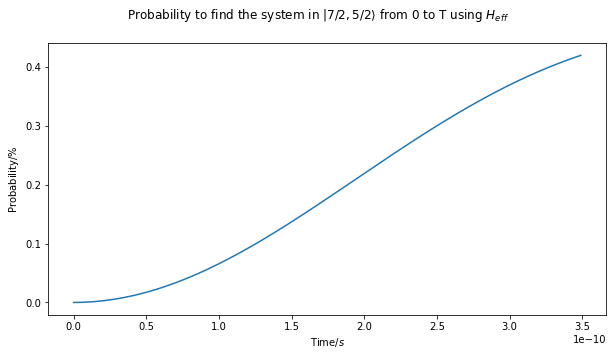

In [15]:
# Plot the effective Hamiltonian probability

plt.figure(figsize=(10,5))
plt.plot(t,prob_at_time_t_heff)
plt.suptitle(r'Probability to find the system in $\left|7/2,5/2\right>$ from 0 to T using $H_{eff}$')
plt.xlabel('Time/$s$')
plt.ylabel('Probability/$\%$')

plt.show()